In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
from Bio import SeqIO
import gzip

# amino acids in sequence > 24
res = {}
ft_type = ['HELIX', 'TURN', 'STRAND', 'ZN_FING', 'MOTIF']
info = dict([(i, 0) for i in ft_type])
info['protein'] = 0
res = dict([(i, []) for i in ft_type])

infile = '/home/yuan/data/downloads/UniProt/uniprot_sprot.dat.gz'
with gzip.open(infile, 'rb') as IN:
    for rec in SeqIO.parse(IN, 'swiss'):
        features = rec.features
        tag = 0
        for ft in features:
            if ft.type in ft_type:
                try:
                    _seq = str(ft.extract(rec.seq))
                    if _seq not in res[ft.type]:
                        res[ft.type].append(_seq)
                    tag = 1
                except Exception as e:
                    print(e)
                    print(rec.id, ft.type, ft.location)
        if tag == 1:
            info['protein'] += 1
with open('./data/secondary_structure.txt', 'w') as OUT:
    for _type, seq_pool in res.items():
        info[_type] = len(seq_pool)
        for _seq in sorted(seq_pool):
            line = [_type, _seq]
            OUT.write('\t'.join(line)+'\n')    
print(info)

Feature references another sequence (P51791-2), references mandatory
P51791 MOTIF P51791-2[12:17]
Feature references another sequence (P51791-4), references mandatory
P51791 MOTIF P51791-4[17:19]
Feature references another sequence (O60716-2), references mandatory
O60716 MOTIF O60716-2[621:629]
Feature references another sequence (O60716-5), references mandatory
O60716 MOTIF O60716-5[621:629]
Feature references another sequence (O60716-6), references mandatory
O60716 MOTIF O60716-6[621:629]
Feature references another sequence (O60716-8), references mandatory
O60716 MOTIF O60716-8[621:629]
Feature references another sequence (O60716-10), references mandatory
O60716 MOTIF O60716-10[567:575]
Feature references another sequence (O60716-13), references mandatory
O60716 MOTIF O60716-13[621:629]
Feature references another sequence (O60716-14), references mandatory
O60716 MOTIF O60716-14[621:629]
Feature references another sequence (O60716-16), references mandatory
O60716 MOTIF O60716-16[621:6

['HELIX', 'TURN', 'STRAND', 'ZN_FING', 'MOTIF']


Text(0, 0.5, 'Average length')

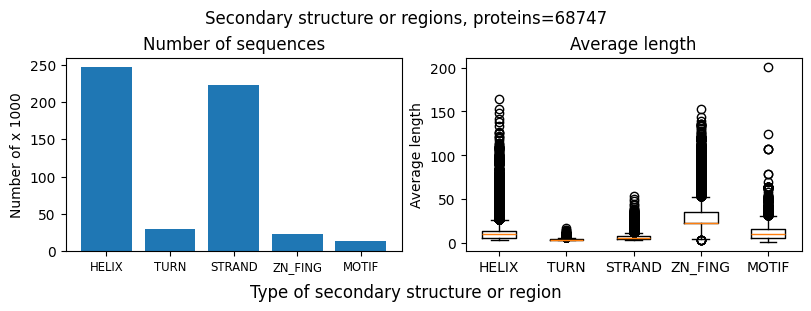

In [110]:
fig, ax = plt.subplots(1,2, figsize=(8,3), layout='constrained')
fig.suptitle(f'Secondary structure or regions, proteins={info["protein"]}')
fig.supxlabel('Type of secondary structure or region')

print(ft_type)
counts = [info[i]/1000 for i in ft_type]
ax[0].bar(range(0, len(ft_type)), counts)
ax[0].set_title(f'Number of sequences')
ax[0].set_xticks(range(0,len(ft_type)))
ax[0].set_xticklabels(ft_type, rotation=0, fontsize='small')
ax[0].set_ylabel('Number of x 1000')

labels, data = res.keys(), [[len(j) for j in i] for i in res.values()]
ax[1].boxplot(data)
ax[1].set_title('Average length')
ax[1].set_xticks(range(1,len(ft_type)+1), ft_type)
ax[1].set_ylabel('Average length')


{'whiskers': [<matplotlib.lines.Line2D at 0x743301906690>,
 'caps': [<matplotlib.lines.Line2D at 0x743301907990>,
 'boxes': [<matplotlib.lines.Line2D at 0x743301905ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x743301910b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x743301911250>,
 'means': []}

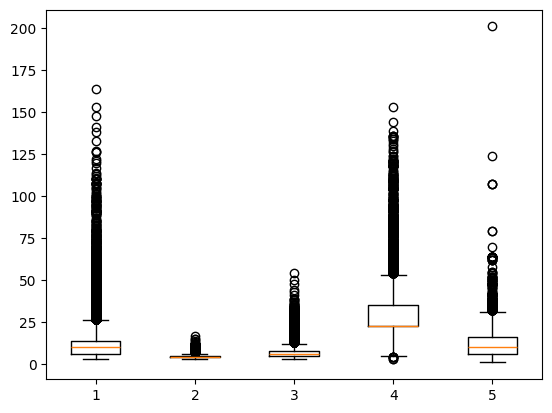